In [51]:
%pylab inline
from astropy import units
from astropy import constants
from cosmotools import rvir, rvir2
from profiles import *
import os.path

Populating the interactive namespace from numpy and matplotlib


In [2]:
font = {'size':13, 'family':'serif'}
matplotlib.rc('font', **font)


In [3]:
# Constants
h = 0.7
H = 67.8 * units.km / units.s / units.Mpc
print G, H

4.51835939627e-39 kpc3 / (s2 solMass) 67.8 km / (Mpc s)


# LMC model 

## LMC: Plummer profile

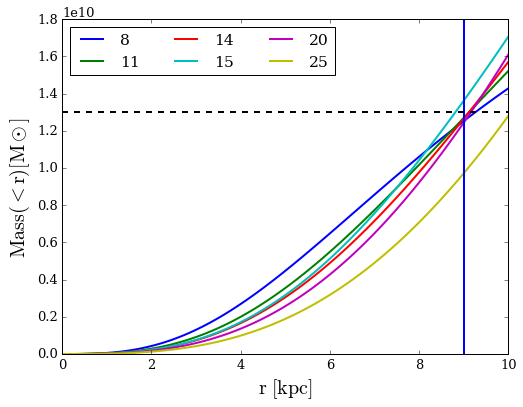

In [7]:
MLMC = [3E10, 5E10, 8E10, 1E11, 1.8E11, 2.5E11]
LMC_c = [8, 11, 14, 15, 20, 25]
x_LMC_inner = linspace(0, 10, 100)
x_LMC_outter = linspace(0, 50, 100)

Mass_LMC_in = zeros([6, 100])
Mass_LMC_out = zeros([6, 100])
Mass_LMC_pin = zeros([6, 100])
Mass_LMC_pout = zeros([6, 100])

figure(figsize=(8, 6))
for i in range(6):
    Mass_LMC_pin[i,:] = mass_plummer(LMC_c[i], x_LMC_inner, MLMC[i])
    Mass_LMC_pout[i,:] = mass_plummer(LMC_c[i], x_LMC_outter, MLMC[i])
    plot(x_LMC_inner, Mass_LMC_pin[i, :], label=str(LMC_c[i]), lw=2)

axvline(9, lw=2)
axhline(1.3E10, lw=2, ls='--', c='k')
legend(loc='best', ncol=3)
xlabel('$\mathrm{r\ [kpc]}$', fontsize=20)
ylabel('$\mathrm{Mass(<r)[M\odot]}$', fontsize=20)
savefig('../doc/LMC_mass_plummer.png', bbox_inches='tight')

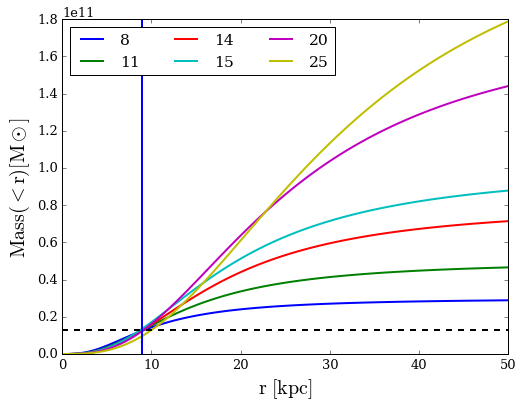

In [8]:
figure(figsize=(8, 6))
for i in range(6):
    plot(x_LMC_outter, Mass_LMC_pout[i, :], lw=2, label=str(LMC_c[i]))

axvline(9, lw=2)
axhline(1.3E10, lw=2, ls='--', c='k')
legend(loc='best', ncol=3)
xlabel('$\mathrm{r\ [kpc]}$', fontsize=20)
ylabel('$\mathrm{Mass(<r)[M\odot]}$', fontsize=20)
savefig('../doc/LMC_mass_plummer_out.png', bbox_inches='tight')

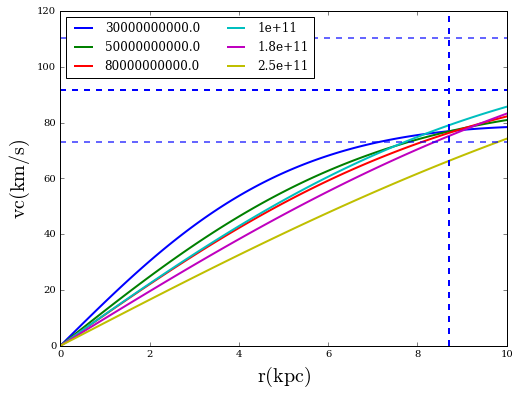

In [76]:
vc_LMC_pin = np.zeros([6, 100])
vc_LMC_pout = np.zeros([6, 100])
figure(figsize=(8, 6))

for i in range(6):
    vc_LMC_pin[i,:] = vc_plummer(LMC_c[i], x_LMC_inner, MLMC[i])
    vc_LMC_pout[i,:] = vc_plummer(LMC_c[i], x_LMC_outter, MLMC[i])
    plot(x_LMC_inner, vc_LMC_pin[i, :], label=str(MLMC[i]), lw=2)

vc_obs = 91.7 
    
axhline(vc_obs, lw=2, ls='--', alpha=1)
axhline(vc_obs+18.8, lw=2, ls='--', alpha=0.6)
axhline(vc_obs-18.8, lw=2, ls='--', alpha=0.6)
xlabel('$\mathrm{r(kpc)}$', fontsize=20)
ylabel('$\mathrm{vc(km/s)}$', fontsize=20)
legend(loc='best', ncol=2)
axvline(8.7, lw=2, ls='--')

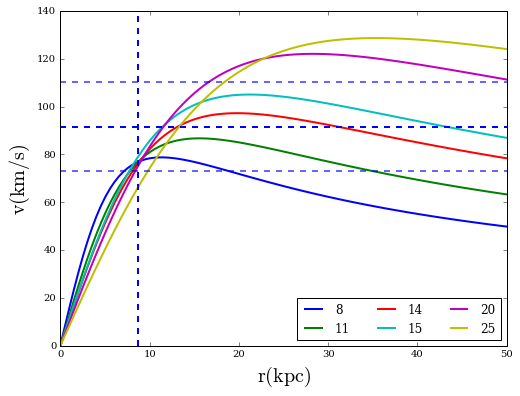

In [77]:
figure(figsize=(8, 6))
for i in range(6):
    plot(x_LMC_outter, vc_LMC_pout[i, :], label=str(LMC_c[i]), lw=2)
axvline(8.7, lw=2, ls='--')
axhline(vc_obs, lw=2, ls='--', alpha=1)
axhline(vc_obs+18.8, lw=2, ls='--', alpha=0.6)
axhline(vc_obs-18.8, lw=2, ls='--', alpha=0.6)
xlabel('$\mathrm{r(kpc)}$', fontsize=20)
ylabel('$\mathrm{v(km/s)}$', fontsize=20)
legend(loc='best', ncol=3)
savefig('../doc/LMC_rotcurve_plummer.png', bbox_inches='tight')

# From cosmological simulations the concentration parameters for the previous Masses for the LMC let to the following rotation curves

### The concentration paramater for a NFW halo is:

In [11]:
def halo_c(M):# from http://adsabs.harvard.edu/abs/2011ApJ...740..102K eq.11
    h = 0.7
    C = 9.60 * (M * h/ 1E12)**(-0.075)
    return C

In [12]:
LMC_c_c1 = halo_c(3E10) # concentration paramter from cosmological simulations http://adsabs.harvard.edu/abs/2011ApJ...740..102K
LMC_c_c2 = halo_c(5E10)
LMC_c_c3 = halo_c(8E10)
LMC_c_c4 = halo_c(1E11)
LMC_c_c5 = halo_c(1.8E11)
LMC_c_c6 = halo_c(2.5E11)

print LMC_c_c1, LMC_c_c2, LMC_c_c3, LMC_c_c4, LMC_c_c5, LMC_c_c6

12.8264001882 12.3442903926 11.9167308634 11.718954823 11.2135582183 10.9406564127


In [22]:
## Finding a/rs ratio from Van Der MArel et al 2012 Apendix

In [39]:
def fx(x):
    f = np.log(1.+x) - (x / (1. + x))
    return f

def ars(c):
    x = 1 / ((2.0*fx(c))**(-0.5) - (1.0/c))
    return x

def mhmvir(ar, cvir):
    x = ar**2 / (2.0*fx(cvir))
    return x

MLMC_hern = np.zeros(6)
RvirLMC = np.zeros(6)
aLMC = np.zeros(6)
LMCc = np.zeros(6)
vcLMC_c = np.zeros([6, len(x_LMC_inner)])
LMC_eM = np.zeros([6, len(x_LMC_inner)])


for i in range(0, 6):
    LMCc[i] = halo_c(MLMC[i])
    RvirLMC[i] = rvir(MLMC[i], 0).value
    aLMC[i] = ars(LMCc[i]) * (rvir(MLMC[i], 0).value / LMCc[i])
    MLMC_hern = mhmvir(ars(LMCc[i]), LMCc) * MLMC[i]
    vcLMC_c[i, :] = vc_hernquist(aLMC[i], x_LMC_inner,  0, 0, MLMC_hern[i])
    LMC_eM[i, :] = mass_hernquist(aLMC[i], x_LMC_inner, MLMC_hern[i])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide


In [40]:
print "LMC conncentration paramter = ", LMCc
print "LMC Virial Radius", RvirLMC
print "LMC hernquist scale length", aLMC

LMC conncentration paramter =  [ 12.82640019  12.34429039  11.91673086  11.71895482  11.21355822
  10.94065641]
LMC Virial Radius [  81.17452307   96.2430392   112.56654152  121.25863099  147.50389748
  164.57328206]
LMC hernquist scale length [ 13.62369682  16.70148416  20.14408643  22.01866128  27.83455468
  31.73046617]


### - Computing the circular velocity for a Hernquist profile

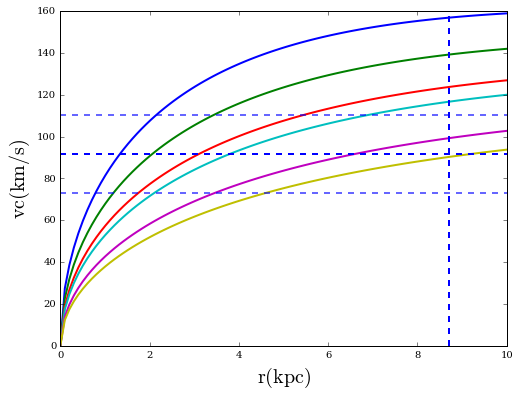

In [78]:
figure(figsize=(8, 6))

for i in range(0, 6):
    vcLMC_c[i, :] = vc_hernquist(aLMC[i], x_LMC_inner,  0, 0, MLMC_hern[i])
    plot(x_LMC_inner, vcLMC_c[i, :], lw=2)
    
xlabel('$\mathrm{r(kpc)}$', fontsize=20)
ylabel('$\mathrm{vc(km/s)}$', fontsize=20)
axhline(vc_obs, lw=2, ls='--', alpha=1)
axhline(vc_obs+18.8, lw=2, ls='--', alpha=0.6)
axhline(vc_obs-18.8, lw=2, ls='--', alpha=0.6)
axvline(8.7, lw=2, ls='--')

### - enclosed Mass

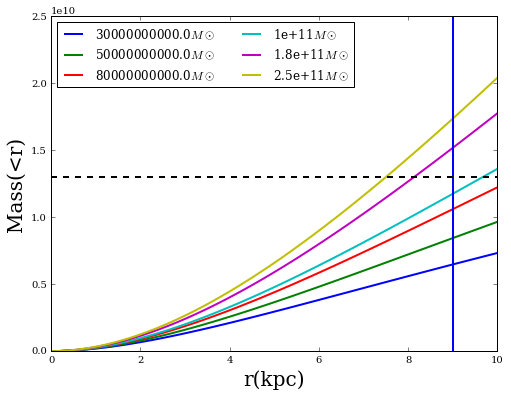

In [80]:
figure(figsize=(8, 6))

for i in range(0, 6):
    plot(x_LMC_inner, LMC_eM[i, :], lw=2, label=str(MLMC[i])+"$M\odot$") 
legend(loc='best', ncol=2)
axvline(9, lw=2)
axhline(1.3E10, lw=2, ls='--', c='k')
xlabel('r(kpc)', fontsize=20)
ylabel('Mass(<r)', fontsize=20)

# Finding the Hernquist scale length:

In [43]:
LMC_dm_mass = 1.7E10 - 3.2E9
print LMC_dm_mass

13800000000.0


In [57]:
a1 = !python LMC_hernquist_a.py 3E10  1.38E10
a2 = !python LMC_hernquist_a.py 5E10  1.38E10
a3 = !python LMC_hernquist_a.py 8E10  1.38E10
a4 = !python LMC_hernquist_a.py 1E11  1.38E10
a5 = !python LMC_hernquist_a.py 1.8E11  1.38E10
a6 = !python LMC_hernquist_a.py 2.5E11  1.38E10

In [58]:
print a1, a2, a3, a4, a5, a6

['4.49924962481'] ['8.44172086043'] ['13.0690345173'] ['15.6603301651'] ['24.1005502751'] ['30.0050025013']


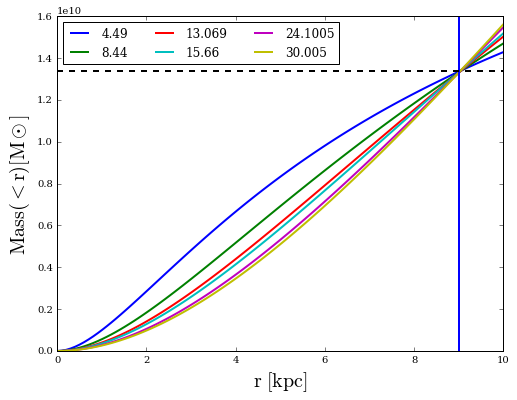

In [66]:
af_LMC = np.array([4.49, 8.44, 13.069, 15.660, 24.1005, 30.005])
LMC_Mf_in = np.zeros([6, 100])
LMC_Mf_out = np.zeros([6, 100])
LMC_rhof_in = np.zeros([6, 100])
LMC_rhof_out = np.zeros([6, 100])
vcLMC_f = np.zeros([6, 100])

figure(figsize=(8, 6))


for i in range(6):
    LMC_Mf_in[i,:] = mass_hernquist(af_LMC[i], x_LMC_inner, MLMC[i])
    LMC_Mf_out[i,:] = mass_hernquist(af_LMC[i], x_LMC_outter, MLMC[i])
    LMC_rhof_in[i,:] = dens_hernquist(af_LMC[i], x_LMC_inner, MLMC[i])
    LMC_rhof_out[i,:] = dens_hernquist(af_LMC[i], x_LMC_outter, MLMC[i])
    plot(x_LMC_inner, LMC_Mf_in[i,:], lw=2, label=str(af_LMC[i]))
    
    
axvline(9, lw=2)
axhline(1.34E10, lw=2, ls='--', c='k')
legend(loc='best', ncol=3)
xlabel('$\mathrm{r\ [kpc]}$', fontsize=20)
ylabel('$\mathrm{Mass(<r)[M\odot]}$', fontsize=20)
savefig('../doc/LMC_mass_hernquist.png', bbox_inches='tight')

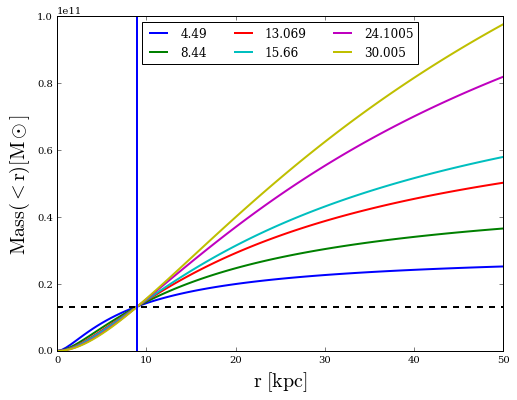

In [60]:
figure(figsize=(8, 6))
for i in range(6):
    plot(x_LMC_outter, LMC_Mf_out[i,:], lw=2, label=str(af_LMC[i]))

legend(loc='best', ncol=3)
axvline(9, lw=2)
axhline(1.3E10, lw=2, ls='--', c='k')
xlabel('$\mathrm{r\ [kpc]}$', fontsize=20)
ylabel('$\mathrm{Mass(<r)[M\odot]}$', fontsize=20)
savefig('../doc/LMC_mass_hernquist_out.png', bbox_inches='tight')

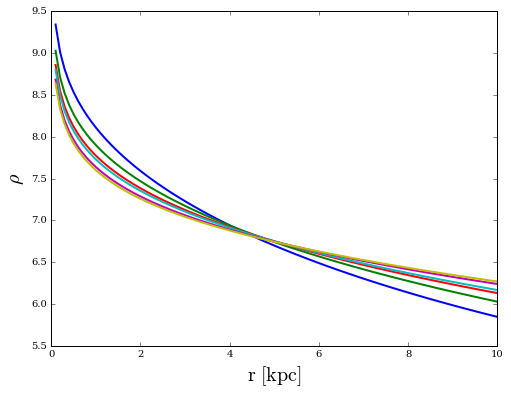

In [68]:
figure(figsize=(8, 6))
for i in range(6):
    plot(x_LMC_inner, log10(LMC_rhof_in[i,:]), lw=2, label=str(af_LMC[i]))
xlabel('$\mathrm{r\ [kpc]}$', fontsize=20)
ylabel(r'$\mathrm{\rho}$', fontsize=20)

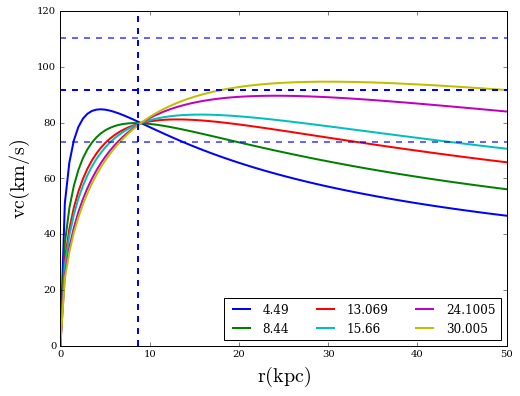

In [69]:
#x20 = np.linspace(0, 20, 100)
figure(figsize=(8, 6))
for i in range(6):
    vcLMC_f[i, :] = vc_hernquist(af_LMC[i], x_LMC_outter,  0, 0, MLMC[i])
    plot(x_LMC_outter, vcLMC_f[i,:], lw=2, label=str(af_LMC[i]))
xlabel('$\mathrm{r(kpc)}$', fontsize=20)
ylabel('$\mathrm{vc(km/s)}$', fontsize=20)
legend(loc='best', ncol=3)
axhline(vc_obs, lw=2, ls='--', alpha=1)
axhline(vc_obs+18.8, lw=2, ls='--', alpha=0.6)
axhline(vc_obs-18.8, lw=2, ls='--', alpha=0.6)
axvline(8.7, lw=2, ls='--')
savefig('../doc/LMC_rotcurve_hernquist.png', bbox_inches='tight')

In [70]:
#Rvir issue

In [ ]:
h = 0.7
Delta_vir = 360
Omega_m = 0.27

def method1(Mvir):
    Rvir = 206 / h * units.kpc * (Delta_vir * Omega_m / 97.2)**(-1.0/3.0) * (Mvir * h / (1E12 * units.Msun) )**(1.0/3.0)
    return Rvir.to(units.kpc)

def method2(Mvir):
    Rvir = (2*G / (H*0.7)**2)**(1/3.0) * (Mvir / (Delta_vir * Omega_m))**(1/3.0)
    return Rvir.to(units.kpc)

In [89]:
Mvir = 1E12 * units.Msun

In [90]:
print 'method 1 ', method1(Mvir)
print 'method 2 ', method2(Mvir)

method 1  261.29746337 kpc
method 2  262.391566682 kpc


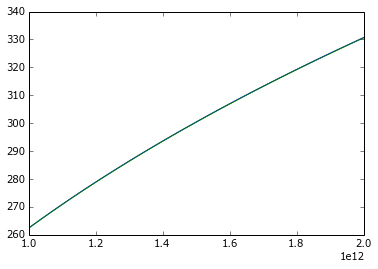

In [131]:
MM = linspace(1E12, 2E12, 100) * units.Msun
plot(MM, method1(MM)*1.0045)
plot(MM, method2(MM))

In [91]:
((G*Mvir*H * sqrt(48.6))**(1/3.0)).to(units.km/units.s)

<Quantity 144.2115290857826 km / s>

In [49]:
 H = 3.2407789E-18  / units.s 

In [82]:
((G*Mvir*H * sqrt(48.6))**(1/3.0)).to(units.km/units.s)

<Quantity 144.2115290857826 km / s>

In [57]:
V = 128.04 * units.km / units.s
Mvir_deduced  = V**3 / (sqrt(48.6) * G * H) 
Rvir_deduced = V / (6.97 * H *0.7)

In [58]:
print Mvir_deduced.to(units.Msun)
print Rvir_deduced.to(units.kpc)

6.9990170459e+11 solMass
262.430857527 kpc


In [59]:
102/0.7

145.71428571428572

In [169]:
(G/H**2).to(units.kpc**3 / units.Msun) * 2

<Quantity 0.001871769949953856 kpc3 / solMass>

In [182]:
206**3 * 97.2 / (1E12 * 0.7**2)

0.0017340908473469391